# Práctica 1: Aprendizaje automático

__Fecha de entrega: 9 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 2: Clasificación

__Número de grupo:__ 4

__Nombres de los estudiantes:__ Fernando de la Gándara Fernández, Laura Marta Marco Simal, Jaime Martínez Gamero

## 1) Carga del conjunto de datos

En este notebook trabajaremos con un conjunto de datos con características de móviles y trataremos de predecir su rango de precio. Las variables del conjunto de datos son las siguientes:

- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Mega Bytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

Crea un dataframe a partir del fichero `mobile_phones.csv` que se proporciona junto con la práctica. Como pandas no tiene forma de saber que la variable `price_range` es en realidad categórica, debes indicárselo tú. 

__Nota__: existen otras variables que también son categóricas (como `blue`, `dual_sim`, etc.) pero como sólo pueden tomar dos valores (son booleanas), en nuestro caso no será problamático interpretarlas como números.

In [1]:
import numpy as np
import pandas as pd

In [2]:
RANDOM_STATE = 333; 

In [3]:
#from google.colab import files
#uploaded = files.upload()

Saving mobile_phones.csv to mobile_phones.csv


In [4]:
#import io
#df = pd.read_csv(io.BytesIO(uploaded['mobile_phones.csv']))
# Dataset is now stored in a Pandas Dataframe

df = pd.read_csv('mobile_phones.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables numéricas con la variable `price_range`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las 4 variables numéricas con mayor correlación con la variable `price_range`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 4 categorías a predecir. ¿Hay pares variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

In [5]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

* Podemos deducir de la ejecución anterior que **el dataset está equilibrado** ya que 
tenemos la misma cantidad de móviles (500) por cada uno de los distintos rangos de precio.

<br>

* Realizar un **entrenamiento con datos desequilibrados** hará que el modelo tenga un sesgo orientado a la predicción de las clases más grandes y en muchos casos **ignorará a las clases más pequeñas por completo**. Esto es debido a la mayor probabilidad previa que ha obtenido el modelo para clasificar datos dentro de los conjuntos más grandes durante el entrenamiento. 



In [6]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


Podemos observar en la tabla de correlación que **la variable que más influe en el precio es la RAM** con un coeficiente de correlación de 0.917 lo cúal significa que mientras mayor sea este valor mayor será el precio.

<br>

Podemos destacar también otras variables como **la resolución de los pixeles en altura y anchura y la duración de la batería** que poseen los **valores muy altos** de correlación después de la RAM ya que a mayor valor de estos mejor es el móvil y por tanto más caro.

<br>

Es importante destacar que algunos valores tienen una correlación negativa, esto significa que mientras menor sea el valor de estas características mayor será el precio. Un ejemplo de esto último es **el peso** ya que **posee un coeficinete de correlación negativo** ya que mientras menor sea el peso del móvil se puede entender que es mejor y por lo tanto más caro.


También se puede apreciar que algunos resultados pueden a simple vista no parecer muy coherentes ya que por ejemplo el **clock_speed tiene una correlación negativa respecto al precio**, esto es, que mientras más bajo sea este valor menor será su precio.Pensamos que esto es posiblemente debido a que mientras menor sea esta velocidad es probable que el procesador del movil tenga más núcleos y por lo tanto, más caro.



In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Los valores de la RAM de los móviles de nuestro conjunto de datos se mueve entre 256 y 3998, los de px_height entre 0 y 1960, los de px_width entre 500 y 1998 y los de battery_power entre 501 y 1998

price_range
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ram, dtype: object

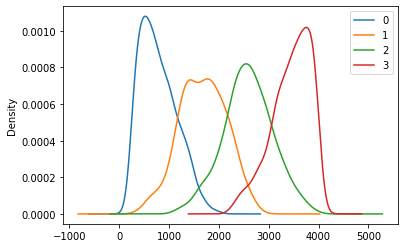

In [8]:
df.groupby(["price_range"])["ram"].plot(kind="density",legend = True)

En cuanto a la relación de la memoria ram de nuestros móviles con respecto a su precio podemos concluir lo siguiente:

<br>

* Los móviles con **categoría de precio 0** tienen en su gran mayoría una **RAM concentrada entre 0 y 1000** siendo el máximo que pueden alcanzar 2000.Esto tiene sentido ya que al ser la categoria 0 la de precio más bajo, los móviles que pertenecen a esta categoría tienen menor RAM.

* Respecto a la **categoría de precio 1** la distribución está algo **mejor repartida que el caso anterior**, concentrandose su mayoría entre los valores 1000 y 2000 y alcanzando unos maximos y minimos cercanos a 0 y 3000.

* Respecto a la **categoría de precio 2** puede apreciarse que es la mejor distribuida dada su **gran similitud con respecto a la distribución normal**.

* Por último con respecto a la **categoría de precio 3** se puede observar que la mayor parte sus móviles suelen concentrarse en un rango donde **la memoria RAM es mucho alta** (entre 3500 y 4000 aproximadamente).

price_range
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: battery_power, dtype: object

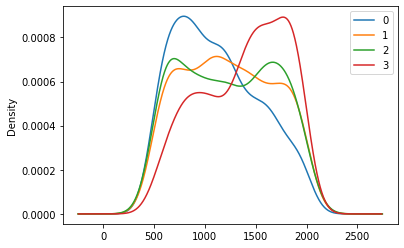

In [9]:
df.groupby(["price_range"])["battery_power"].plot(kind="density",legend = True)

Con respecto a la duración de la batería podemos apreciar que **los móviles con categoría de precio 0 tienden a concentrarse en rangos donde este valor es menor**.

Los móviles con **categorias de precio 1 y 2 se concentran en rangos similares** (entre 500-1800 aprox) al considerarse de gama media y por último los móviles de **gama alta** (cat 3) tienen una **gran duración de la batería** en su mayoría aunque la de alguno de ellos coincide con las de móviles de gama media o baja.

Estos últimos podrían ser iphones ya que estos teléfonos destacan más por otras características como la cámara y en el campo de la batería dejan mucho que desear.

price_range
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: px_height, dtype: object

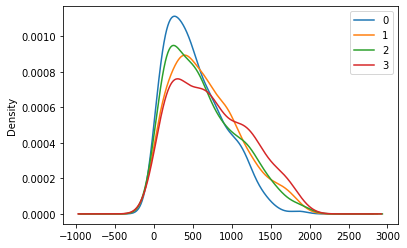

In [10]:
df.groupby(["price_range"])["px_height"].plot(kind="density",legend = True)

Con respecto a la variable px_height podemos observar que la mayoría de los telefónos móviles **independientemente de su categoria de precio tienen una resolución similar** (entre 250 y 500).

 Mientras **más aumenta la categoría** hay moviles con **resolución mayor a todos los móviles de la categoría anterior**. Por ejemplo en la categoría de precio 3 hay móviles con resolución superior a los todos los móviles de las categorías 0,1 y 2.

Con respecto a la resolución de los pixeles 

price_range
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: px_width, dtype: object

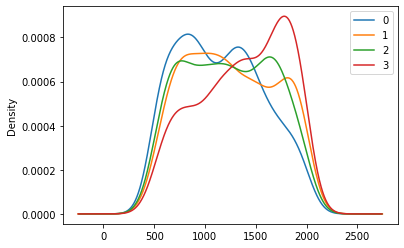

In [11]:
df.groupby(["price_range"])["px_width"].plot(kind="density",legend = True)

Con respecto a la variable px_width ocurre algo similar con la gráfica anterior. La mayoría de los teléfonos de las categorias de precio 0,1 y 2 se concentran en resoluciones similares aunque **algunos telefonos de la categoría 1 tienen mayor resolucion que telefonos de categoria 2** a pesar de tener estos últimos un precio mayor.

Los teléfonos de categoria de precio 3 se concentran en su gran mayoría en una resolución entre 1500 y 2000 siendo ésta la más alta, aunque algunos teléfonos de esta categoria tienen resoluciones similares a las de teléfonos de gama inferior.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad9de6d750>,
      dtype=object)

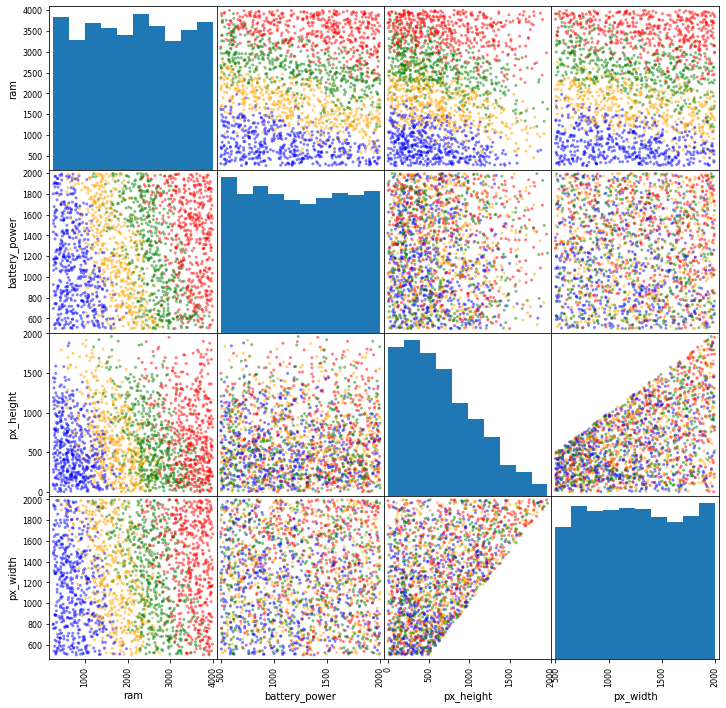

In [12]:
from pandas.plotting import scatter_matrix
%matplotlib inline

df_std = df.loc[:,['ram', 'battery_power', 'px_height', 'px_width']].copy()

dic_colors = { 0: 'blue', 1: 'orange', 2: 'green', 3:'red' }
colors = df['price_range'].map(dic_colors)

scatter_matrix(df_std, figsize = (12, 12), diagonal = 'hist', color=colors)

En el diagrama de dispersión anterior se puede observar que los pares de variables que **mejor clasifican** nuestros móviles en cuanto a las categorías de precios son los **pares en los que la ram interviene como una de las componentes**.
Estos son los pares (ram, battery_power),(ram,px_height) y (ram,px_width). 

Con **otros pares** no se puede sacar nada en claro ya que todos los colores se encuentran mezclados y **no se aprecian zonas donde claramente predomine una categoria de precios u otra**.

<br>



En cuanto a la resolución del problema en sí, desde nuestro punto de vista creemos que con el dataset proporcionado el problema no tendrá muchas dificultades ya que los **datos** estan **bien equilibrados** y representan una **imagen fiel del mercado** en su realidad como se puede apreciar en la tabla de correlaciones ya que con los datos de nuestro dataset esta demostrado que mientras mejores sean las características de nuestros teléfonos móviles más aumentará el precio.

<br>

Probablemente puedan ocurrir **errores de clasificación con respecto a las categorías 1 y 2** a la hora de determinar si un telefono pertenece a ellas ya que son muy similares entre sí en algunos casos como por ejemplo la resolución, dónde hay teléfonos que tienen mejor resolución pero sin embargo su categoría de precio es inferior.Creemos que en gran parte estos errores provienen de la propia naturaleza del mercado ya que **que un teléfono pertenezca a una categoría superior eso no implica necesariamente que sea mejor en todas las características**, si no que depende relativamente de cúal es el uso al que va a estar destinado.

<br>

Respecto a **las categorías 0 y 3** al ser gamas tan alejadas entre sí su **clasificación** será **más sencilla** al utilizar los datos proporcionados como entrenamiento ya que se pueden apreciar grandes diferencias entre ellos.



## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

En este caso **no es necesario estandarizar los datos** ya que los árboles de decisión no son sensibles a las variaciones de los datos.

La razón por la que esto sucede es porque en los árboles de decisión para encontrar la mejor división, **se busca en cada atributo o dimensión un punto de separación** que es básicamente una cáusula if que agrupa los valores objetivo correspondientes a las instancias que tienen un valor de prueba menor que el valor de división y, a la derecha los valores mayores o iguales.

Esto significa que **la información real de los atributos para encontrar la división es solo el orden de los valores** por lo tanto cualquier transformación de los atributos que preserve el orden original obtendrá el mismo árbol.

## 4) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando el número mínimo de ejemplos para dividir un nodo (parámetro `min_samples_split`) y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

# Obtenemos los arrays internos del dataframe
df_target = df.loc[:,['price_range']].to_numpy()
df_data = df.drop(columns='price_range').to_numpy()

In [14]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
samples_split = range(2, 15)
for sp in samples_split: 
    clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=sp, random_state=RANDOM_STATE)
    scores = cross_validate(clf, df_data, df_target, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

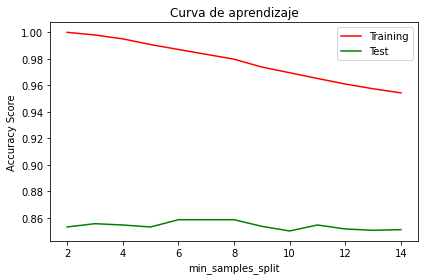

In [15]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(samples_split, train_accuracy, color="r",  label="Training")
plt.plot(samples_split, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("min_samples_split"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

Cuando el parámetro **min_sample_split toma los valores 6 y 8** se obtiene el mejor valor de exactitud para el conjunto de test. 

A partir de esos valores la métrica empeora tanto para el conjunto de entrenamiento como para el de prueba lo que significa que está sobreaprendiendo. 

Puesto que métrica empeora progresivamente **consideramos más razonable escoger el valor 6** para el parámetro min_sample_split ya que obtiene una puntuación mayor en el conjunto de datos del entrenamiento.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.

In [16]:
# Creamos un nuevo árbol de decisión
clf = DecisionTreeClassifier(criterion="entropy", max_depth=15, min_samples_split=6, random_state=RANDOM_STATE)
clf = clf.fit(df_data, df_target)

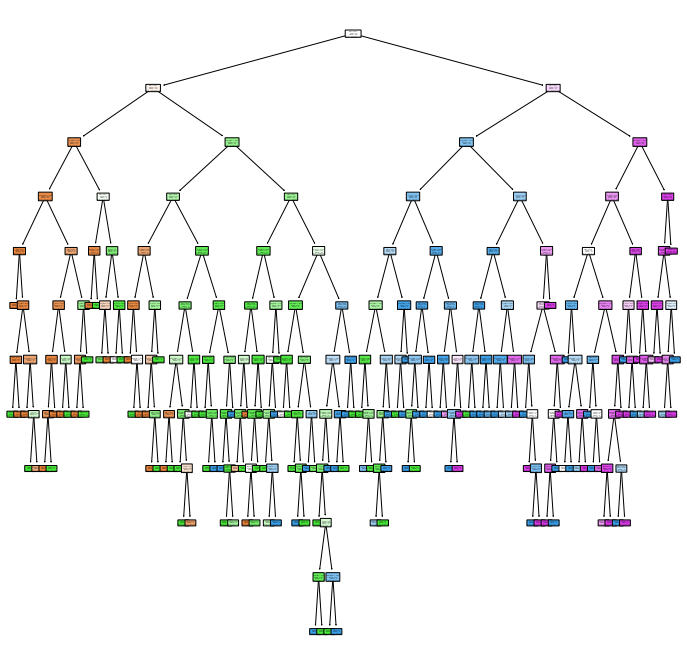

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(12,12))
plot_tree(clf, filled=True, feature_names=df.columns.drop('price_range'), class_names=['0','1','2','3'], rounded=True)
plt.show()

Feature: 0, Score: 0.11614
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00514
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00093
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00681
Feature: 7, Score: 0.00791
Feature: 8, Score: 0.01452
Feature: 9, Score: 0.00645
Feature: 10, Score: 0.00528
Feature: 11, Score: 0.06204
Feature: 12, Score: 0.08253
Feature: 13, Score: 0.68406
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00196
Feature: 16, Score: 0.00538
Feature: 17, Score: 0.00084
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


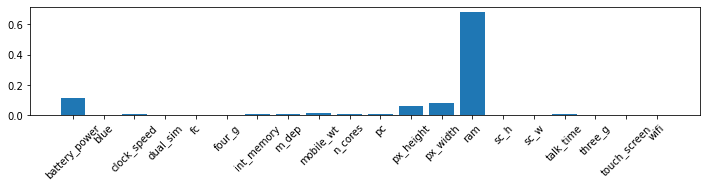

In [18]:
from matplotlib import pyplot as plt

importance = clf.feature_importances_
# summarize feature importance



for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.figure(figsize=(12,2))
feature_names=df.columns.drop('price_range')
plt.bar([x for x in range(len(importance))], importance, tick_label = feature_names)
plt.xticks(rotation = 45) 
plt.show()

Según los resultados obtenidos podemos concluir por la puntuación que las **variables más importantes** son en el orden siguiente:
* **RAM**
* **Battery_power**
* **px_width**
* **px_height**

<br>

Por otra parte observamos que las variables **blue, four_g**, **sc_h** y **touch_screen** no han sido utilizadas ya que su puntuación es 0.




In [19]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=1, min_samples_split=6, random_state=RANDOM_STATE)

scores = cross_validate(clf, df_data, df_target, scoring='accuracy', cv=10, return_train_score=True)
    
train_accuracy = np.mean(scores['train_score'])
train_accuracy

0.5

Si sólo se hiciese una pregunta la **tasa de aciertos** del árbol sobre el conjunto de datos del entrenamiento sería del **50%**.

In [20]:
from sklearn.model_selection import train_test_split

# Partimos el conjunto de datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.3, random_state=RANDOM_STATE)

# Creamos y entrenamos el árbol de decisión con los parámetros por defecto
clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=6, random_state=RANDOM_STATE)
clf = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
train_accuracy, test_accuracy

(0.9885714285714285, 0.8516666666666667)

Si separamos nuestros datos en un conjunto de entrenamiento y otro de prueba, obtenemos que nuestro árbol obtiene una tasa de aciertos del **85%** por lo que aunque haya sobreaprendido, es capaz de separar las clases.

In [21]:
# Creamos un nuevo árbol de decisión
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=6, random_state=RANDOM_STATE)
clf = clf.fit(df_data, df_target)

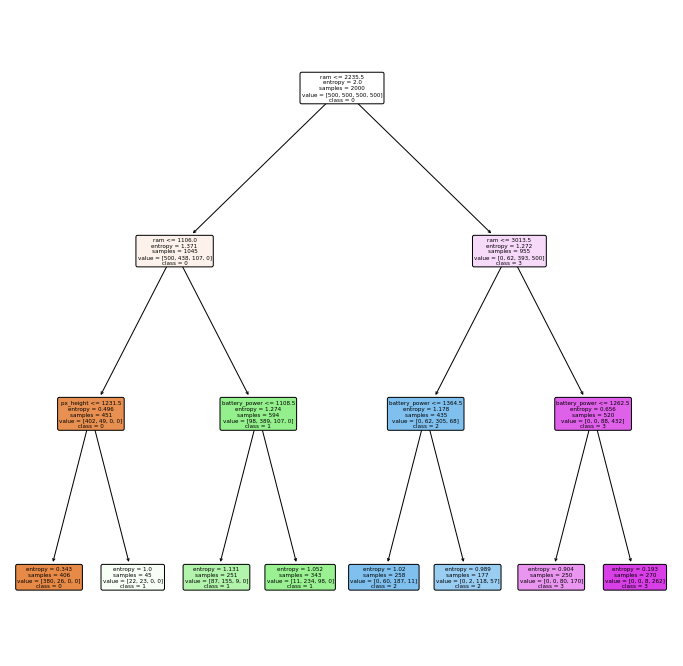

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(12,12))
plot_tree(clf, filled=True, feature_names=df.columns.drop('price_range'), class_names=['0','1','2','3'] , rounded=True)
plt.show()

Por definición del algoritmo de construcción del árbol en los **primeros niveles** se utilizan las **variables que mejor diferencian** las clases que estamos intentando clasificar.

En consecuencia, las variables **ram** y **battery_power** son las que mejor discriminan las clases puesto que se utilizan primero

En cuanto a qué clases se separan peor, si observamos el árbol completo podemos observar que los móviles con categoria de precio **1** y **2** necesitan de una mayor profundidad para ser clasificados con respecto a los móviles de categoría de precio 0 y 3. Esto significa que para poder concluir a que clase pertenecen necesitan recurrir a una mayor cantidad de características y por lo tanto son **más difciles de separar**. 

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
predictions = cross_val_predict(clf, df_data, df_target, cv=10)

# Informe por clases
cr = classification_report(df_target,predictions, target_names=['0','1','2','3'])
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       500
           1       0.64      0.77      0.70       500
           2       0.70      0.60      0.64       500
           3       0.83      0.86      0.85       500

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



Otra forma de ver que las **clases 1 y 2** son más difíciles de clasificar es que su **precisión (64%, 77%)** y **exhaustividad (70%, 60%)** son más bajas en comparación con las de las clases 0 y 3 encontrándose en torno al 80-90% en estas últimas

In [24]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[402  98   0   0]
 [ 55 383  62   0]
 [  0 112 300  88]
 [  0   0  69 431]]


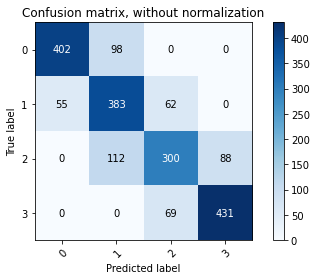

In [25]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2, min_samples_split=6, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, df_data, df_target, cv=10)
plot_confusion_matrix(df_target, predictions, ['0','1','2','3'], normalize=False)

Observando la matriz de confusión para el nivel 2 del árbol podemos observar que el **nodo con mayor confusión** es el nodo verde (clase 1) ya que de todos los nodos es el que posee la mayor proporción de **falsos positivos y negativos** con respecto al número total de predicciones (aproximadamente el 35% de los datos que hay en este nodo no son de **clase 1**)

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [26]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 12)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=6, random_state=RANDOM_STATE)
    scores = cross_validate(clf, df_data, df_target, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

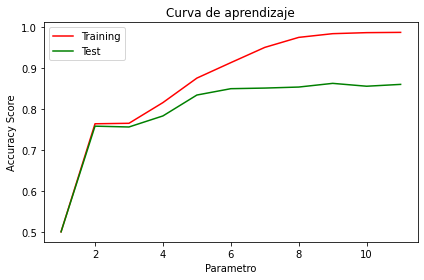

In [27]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

La **profundidad óptima** del árbol es **9**

In [28]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=9, min_samples_split=6, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, df_data, df_target, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8638856435603447
Exhaustividad ponderada media:  0.8625
F1 ponderado media:  0.8625043922449767


La **precisión ponderada** de nuestro clasificador es del **86%**, esto significa que aproximadamente 9/10 datos clásificados por nuestro árbol de decisión serán válidos o dicho de otra forma clasificados correctamente.Puesto que este valor es bastante alto podemos concluir que nuestro clasificador tiene una **tasa baja de falsos positivos**.

Respecto a la **exhaustividad ponderada** su valor es del **86%** aproximadamente, esto significa que aproximadamente por cada 10 teléfonos que realmente pertenecían a una categoría identificamos 9 de ellos con dicha categoría.Puesto que este valor es bastante alto, al contrario como sucedía con Precision podemos concluir que nuestro clasificador tiene una **tasa baja de falsos negativos**. 

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report


# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
predictions = cross_val_predict(clf, df_data, df_target, cv=10)

# Informe por clases
cr = classification_report(df_target,predictions, target_names=['0','1','2','3'])
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       500
           1       0.84      0.84      0.84       500
           2       0.81      0.81      0.81       500
           3       0.89      0.89      0.89       500

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



Podemos concluir de la tabla anterior que nuestro modelo clasifica mejor los móviles cuyo rango de precio es de categoría 0 ya que posee los valores más altos de precision y recall y por lo tanto de f1-score ya que es una combinación de estas dos últimas.

Seguido de esta categoría se encuentran los moviles de gama alta que posee una precisión y exhaustividad del 89%.

Por otra parte los puntos débiles de nuestro modelo son los móviles de categoría de precios 1 y 2 ya que poseen los valores de precisión y recall más bajos, esto significa que es más probable que nuestro modelo se confunda al clasificar móviles que realmente pertenecen a esta categoría.

Confusion matrix, without normalization
[[457  43   0   0]
 [ 42 420  38   0]
 [  0  39 405  56]
 [  0   0  57 443]]


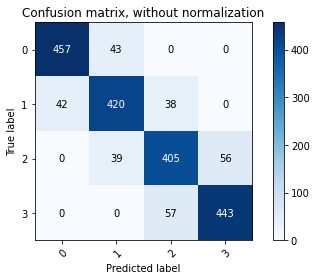

In [30]:
predictions = cross_val_predict(clf, df_data, df_target, cv=10)
plot_confusion_matrix(df_target, predictions, ['0','1','2','3'], normalize=False)

Observando la matriz de confusión podemos observar que aparecen ceros en las esquinas inferior izquierda y superior derecha, esto es debido a que nuestro clasificador produce **falsos negativos** y **falsos positivos** unicamente en las **categorias** que son **consecutivas**.

La razón por la que ocurre esto es porque en los primeros niveles del árbol se utilizan los mejores atributos(en nuestro caso ram y battery_power) para diferenciar de manera más o menos consistente los grupos por lo que en niveles más profundos del árbol es **más complicado confundir clases con aquellas que están más alejadas entre sí**. 

Por otra parte combinando los datos de Recall y Precision de la tabla anterior junto a la matriz de confusión podemos concluir que los teléfonos que pertenecen a la categoría de precios **1 y 2 suelen producir ligeramente más falsos negativos y positivos que los de las categorías 0 y 3**. Esto es debido a que las características de los móviles de las categorías 1 y 2 son bastante similares entre sí como pudimos observar en la parte de analizar los datos. Estas **similitudes** llegan hasta tal punto que en muchos aspectos algunos de los valores de las características que más están correlacionadas con el rango de precios suelen intercalarse dificultando de forma considerable la tarea de reconocer a que categoría pertenece cada teléfono.  

<br>
<br>


Respecto a las ***ventajas*** de los árboles de decisión de cara a su uso en una empresa: 

* Son **simples de entender** e interpretar con una breve explicación, lo cúal es bastante importante porque los datos y conclusiones que se obtienen son utilizados por otros departamentos donde el nivel de comprensión de estas herramientas no es tan profundo.

* Pueden generar **conocimientos avanzados en una materia relevante** que describen una situación.

<br>

Respecto a las ***desventajas***:

* **Inestables** en el sentido de que un pequeño cambio en los datos puede provocar un gran cambio en la estructura de decisión del árbol.

* Pueden aparecer **calculos muy complejos** si muchos valores no son verdad o si muchos resultados están relacionados.

* Son r**elativamente inexactos** 

En conclusión pensamos que otras técnicas funcionarían mejor con datos similares.

## 7) Usando el clasificador k-NN 
Intenta resolver el mismo problema usando un clasificador k-NN. Para ello, elige las variables que consideres más relevantes para el problema, basándote principalmente en el estudio que has hecho del mismo en los apartados anteriores (o alguno adicional que hagas aquí si lo consideras adecuado). Tendrás que decidir, si escalas las variables o no, y qué valor de k consideras el más adecuado.

Analiza los resultados obtenidos y di por qué crees que suceden.


Para resolver el problema utilizaremos las variables ram, battery_power, px_width y px_height por su mayor correlación con la variable que estamos intentando predecir.

Estas variables son todas numericas pero como cada una de ellas tiene una escala diferente es necesario escalar los datos para utilizar k-NN

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Normalizamos los datos escalándolos al intervalo [0,1]
scaler = MinMaxScaler()
scaler.fit(df_data)
data_scaled = scaler.transform(df_data) # Lo almacenamos en el dataset original

In [35]:
# Creamos un nuevo dataframe con los datos escalados
df_scaled = pd.DataFrame(data=data_scaled, columns=df.columns.drop('price_range'))
df_scaled['result'] = df_target
df_scaled['result'] = df_scaled['result'].map({0: '0', 1: '1', 2: '2', 3:'3'})
df_scaled.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,0.495825,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,0.303216,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,0.250000,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,0.500000,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,0.750000,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Encontramos el valor de k utilizando validación cruzada

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,500)
for k in k_values: 
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf, data_scaled, df_target.ravel(), scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))


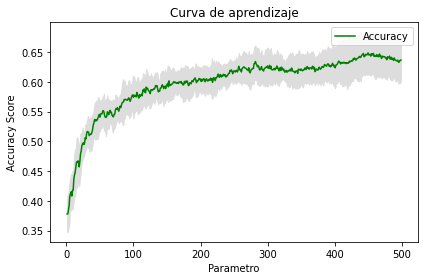

In [51]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

El mejor valor de k es aproximadamente 450

In [53]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase.  
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra porque la muestra está desbalanceada
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=4 sobre los datos re-escalados
clf = KNeighborsClassifier(450, weights='distance')

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, data_scaled, df_target.ravel(), scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# scores te devuelve un diccionario con varios elementos, 
# entre ellos los resultados de las métricas elegidas en el test
scores

{'fit_time': array([0.00124145, 0.00118923, 0.01245499, 0.00109792, 0.00119257,
        0.00131488, 0.0013938 , 0.00141335, 0.00126505, 0.00111818]),
 'score_time': array([0.15212703, 0.14121485, 0.13310194, 0.16347671, 0.12198901,
        0.15028167, 0.09127331, 0.05438519, 0.04115295, 0.07339072]),
 'test_f1_weighted': array([0.66134431, 0.69893597, 0.67053867, 0.63021867, 0.65090299,
        0.68835867, 0.61131489, 0.64784478, 0.57931995, 0.63215318]),
 'test_precision_weighted': array([0.66381617, 0.70538904, 0.67714584, 0.64310861, 0.67661824,
        0.70230096, 0.62106513, 0.66035772, 0.58304568, 0.65018068]),
 'test_recall_weighted': array([0.66 , 0.7  , 0.67 , 0.63 , 0.65 , 0.69 , 0.61 , 0.65 , 0.585,
        0.64 ])}

In [54]:
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.6583028087584799
Exhaustividad ponderada media:  0.6485
F1 ponderado media:  0.6470932068937881


In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = KNeighborsClassifier(450, weights='distance')
predictions = cross_val_predict(clf, data_scaled, df_target.ravel(), cv=10)

# Informe por clases
cr = classification_report(df_target.ravel(), predictions, target_names=['0','1','2','3'])
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       500
           1       0.54      0.44      0.48       500
           2       0.51      0.65      0.57       500
           3       0.82      0.69      0.75       500

    accuracy                           0.65      2000
   macro avg       0.66      0.65      0.65      2000
weighted avg       0.66      0.65      0.65      2000



En general dada toda la información anterior podemos afirmar que los resultados obtenidos son bastante peores que los que obtenemos al utilizar un árbol de decisión.

Sin embargo algunas características siguen manteniéndose, como por ejemplo que el clasificador funciona mejor a la hora de predecir las etiquetas 0 y 3 frente a las etiquetas 1 y 2.

Pensamos que los resultados en general utilizando k-NN son peores ya que las categorias consecutivas tienen a menudo características similares entre sí.

La razón por la que ocurre esto es porque que un móvil tenga una categoría de precio superior no implica que se mejor en todas las características que cualquier móvil que una categoría de precio inferior.

Por lo tanto, al escoger los k vecinos más cercanos, en la etiqueta que se predice predominará cuantos de esos vecinos pertenecen a una categoría u otra sin tener en cuenta que por ejemplo un móvil de categoría 2 podría competir con uno de categoría en algunas características en concreto llegando incluso a superarlas.